In [4]:
#Resolucion del ejercicio 1
print("Según la información disponible en la página del INDEC, las personas desocupadas son aquellas que no tienen trabajo, están buscando activamente trabajo, y están disponibles para comenzar a trabajar.")

Según la información disponible en la página del INDEC, las personas desocupadas son aquellas que no tienen trabajo, están buscando activamente trabajo, y están disponibles para comenzar a trabajar.


In [7]:
#Resolucion del punto A
#instalar pandas si no lo tienen. Debes sacar # de #!pip install pandas.
#!pip install pandas
#importar pandas 
import pandas as pd 
import os 
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
# Convertir los nombres de columnas a mayúsculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40 o NOA
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
df_2004["REGION"] = 40  # Homogeneizar valores de REGION
# Unir ambos archivos
df = pd.concat([df_2024, df_2004])
# Resetear índice y mostrar
df.reset_index(drop=True, inplace=True)
print(df.shape)
display(df)

(19092, 181)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOPUYHMOKPCDEGOIH00800329,2024.0,1,1.0,1,1,40,N,18,371.0,...,5.0,7,NaN,6.0,8,367.0,NaN,NaN,NaN,NaN
1,TQRMNOPUYHMOKPCDEGOIH00800329,2024.0,1,1.0,2,1,40,N,18,371.0,...,5.0,7,NaN,6.0,8,367.0,NaN,NaN,NaN,NaN
2,TQRMNOPUYHMOKPCDEGOIH00800329,2024.0,1,1.0,3,1,40,N,18,371.0,...,5.0,7,NaN,6.0,8,367.0,NaN,NaN,NaN,NaN
3,TQRMNOPUYHMOKPCDEGOIH00800329,2024.0,1,1.0,4,1,40,N,18,371.0,...,5.0,7,NaN,6.0,8,367.0,NaN,NaN,NaN,NaN
4,TQRMNOTSQHJKLMCDEGOIH00795856,2024.0,1,1.0,1,1,40,N,18,716.0,...,3.0,4,NaN,3.0,5,706.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19087,288280,2004.0,1er. Trimestre,1.0,3.0,0.0,40,S,Gran Tucumán - Tafí Viejo,258.0,...,04,06,04,,05,NaN,0.0,0.0,0.0,00000
19088,288280,2004.0,1er. Trimestre,1.0,4.0,0.0,40,S,Gran Tucumán - Tafí Viejo,258.0,...,04,06,04,,05,NaN,0.0,0.0,0.0,00000
19089,288280,2004.0,1er. Trimestre,1.0,5.0,0.0,40,S,Gran Tucumán - Tafí Viejo,258.0,...,04,06,04,,05,NaN,0.0,0.0,0.0,00000
19090,288337,2004.0,1er. Trimestre,1.0,1.0,Sí,40,S,Gran Tucumán - Tafí Viejo,209.0,...,05,07,05,,07,NaN,0.0,0.0,0.0,00000


In [82]:
#Resolucion del ejercicio 2
#Resolucion del punto B 
#importar pandas y numpy
import pandas as pd 
import os 
import numpy as np
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
# Convertir los nombres de columnas a mayúsculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40 o NOA
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
df_2004["REGION"] = 40  # Homogeneizar valores de REGION
# Lista de las variables de interes
variables_interes = [ 'ANO4', 'REGION', 'PONDERA', 'CH03' , 'CH04', 'CH08' ,'CH06', 'CH07' , 'NIVEL_ED' , 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04G' , 'PP07C', 'PP08D1' ]
# Homogeneizar los valores
df_2004['CH03'] = df_2004['CH03'].map({'Jefe': 1 , 'Cónyuge/Pareja': 2, 'Hijo/Hijastro': 3, 'Yerno/Nuera': 4, 'Nieto': 5, 'Madre/Padre': 6, 'Suegro': 7, 'Hermano': 8, 'Otros familiares': 9, 'No familiares': 10}) 
df_2004['CH04'] = df_2004['CH04'].map({'Varón': 1, 'Mujer': 2})
df_2004['CH08'] = df_2004['CH08'].map({'Obra social (incluye PAMI)': 1, 'Mutual/prepaga/servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns/Nr': 9, 'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Obra social y planes y seguros públicos': 13, 'Mutual/prepaga/servicio de emergencia/Planes y seguros públicos': 23, 'Obra social, mutual/prepaga/servicio de emergencia y planes y seguros públicos': 123})
df_2004['CH07'] = df_2004['CH07'].map({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
df_2004['NIVEL_ED'] = df_2004['NIVEL_ED'].map({'Primario incompleto (incluye educación especial)': 1, 'Primario completo': 2, 'Secundario incompleto': 3, 'Secundario completo': 4, 'Superior universitario incompleto': 5, 'Superior universitario completo': 6, 'Sin instrucción': 7, 'Ns/Nr': 9,})
df_2004['ESTADO'] = df_2004['ESTADO'].map({'Entrevista individual no realizada (no respuesta al cuestionario individual)': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4})
df_2004['CAT_OCUP'] = df_2004['CAT_OCUP'].map({'Patrón': 1, 'Cuenta propia': 2, 'Obrero o empleado': 3, 'Trabajador familiar sin remuneración': 4, 'Ns/Nr': 9})
df_2004['CAT_INAC'] = df_2004['CAT_INAC'].map({'Jubilado/pensionado': 1, 'Rentista': 2, 'Estudiante': 3, 'Ama de casa': 4, 'Menor de 6 años': 5, 'Discapacitado': 6, 'Otros': 7})
df_2024['CAT_OCUP'] = df_2024['CAT_OCUP'].replace(0, np.nan)
df_2024['PP04G'] = df_2024['PP04G'].replace(0, np.nan)
df_2024['PP07C'] = df_2024['PP07C'].replace(0, np.nan)
df_2024['PP08D1'] = df_2024['PP08D1'].replace(0, np.nan)
df_2004['CAT_OCUP'] = pd.to_numeric(df_2004['CAT_OCUP'], errors='coerce')
df_2004['CAT_OCUP'] = df_2004['CAT_OCUP'].replace(0, np.nan)
df_2004['PP04G'] = pd.to_numeric(df_2004['PP04G'], errors='coerce')
df_2004['PP04G'] = df_2004['PP04G'].replace(0, np.nan)
df_2004['PP07C'] = pd.to_numeric(df_2004['PP07C'], errors='coerce')
df_2004['PP07C'] = df_2004['PP07C'].replace(0, np.nan)
df_2004['PP08D1'] = pd.to_numeric(df_2004['PP08D1'], errors='coerce')
df_2004['PP08D1'] = df_2004['PP08D1'].replace(0, np.nan)
# Seleccionar las columnas de las variables de interes
df_2024 = df_2024[variables_interes]
df_2004 = df_2004[variables_interes]
# Reportar valores faltantes
print("\nValores faltantes en df_2024:")
print(df_2024.isnull().sum())
print("\nValores faltantes en df_2004:")
print(df_2004.isnull().sum())


Valores faltantes en df_2024:
ANO4           0
REGION         0
PONDERA        0
CH03           0
CH04           0
CH08           0
CH06           0
CH07           0
NIVEL_ED       0
ESTADO         0
CAT_OCUP    5249
CAT_INAC       0
PP04G       5738
PP07C       6777
PP08D1      6577
dtype: int64

Valores faltantes en df_2004:
ANO4           0
REGION         0
PONDERA        0
CH03           0
CH04           0
CH08         725
CH06           0
CH07           0
NIVEL_ED    8256
ESTADO         8
CAT_OCUP    5624
CAT_INAC    3942
PP04G       9393
PP07C       9393
PP08D1      7464
dtype: int64


In [87]:
print("Los variables CH08, NIVEL_ED, CAT_OCUP, CAT_INAC, PP04G, PP07C, PP08D1 son los que tienen valores faltantes, y los variables PP07C y PP04G del 2004 es el que tiene mas valores faltantes.")

Los variables CH08, NIVEL_ED, CAT_OCUP, CAT_INAC, PP04G, PP07C, PP08D1 son los que tienen valores faltantes, y los variables PP07C y PP04G del 2004 es el que tiene mas valores faltantes.


In [97]:
#Resolucion del punto C
#importar pandas y numpy
import pandas as pd 
import os 
import numpy as np
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
# Convertir los nombres de columnas a mayúsculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40 o NOA
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
df_2004["REGION"] = 40  # Homogeneizar valores de REGION
# Lista de las variables de interes
variables_interes = [ 'ANO4', 'REGION', 'PONDERA', 'CH03' , 'CH04', 'CH08' ,'CH06', 'CH07' , 'NIVEL_ED' , 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04G' , 'PP07C', 'PP08D1' ]
# Homogeneizar los valores
df_2004['CH03'] = df_2004['CH03'].map({'Jefe': 1 , 'Cónyuge/Pareja': 2, 'Hijo/Hijastro': 3, 'Yerno/Nuera': 4, 'Nieto': 5, 'Madre/Padre': 6, 'Suegro': 7, 'Hermano': 8, 'Otros familiares': 9, 'No familiares': 10}) 
df_2004['CH04'] = df_2004['CH04'].map({'Varón': 1, 'Mujer': 2})
df_2004['CH08'] = df_2004['CH08'].map({'Obra social (incluye PAMI)': 1, 'Mutual/prepaga/servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns/Nr': 9, 'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Obra social y planes y seguros públicos': 13, 'Mutual/prepaga/servicio de emergencia/Planes y seguros públicos': 23, 'Obra social, mutual/prepaga/servicio de emergencia y planes y seguros públicos': 123})
df_2004['CH07'] = df_2004['CH07'].map({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
df_2004['NIVEL_ED'] = df_2004['NIVEL_ED'].map({'Primario incompleto (incluye educación especial)': 1, 'Primario completo': 2, 'Secundario incompleto': 3, 'Secundario completo': 4, 'Superior universitario incompleto': 5, 'Superior universitario completo': 6, 'Sin instrucción': 7, 'Ns/Nr': 9,})
df_2004['ESTADO'] = df_2004['ESTADO'].map({'Entrevista individual no realizada (no respuesta al cuestionario individual)': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4})
df_2004['CAT_OCUP'] = df_2004['CAT_OCUP'].map({'Patrón': 1, 'Cuenta propia': 2, 'Obrero o empleado': 3, 'Trabajador familiar sin remuneración': 4, 'Ns/Nr': 9})
df_2004['CAT_INAC'] = df_2004['CAT_INAC'].map({'Jubilado/pensionado': 1, 'Rentista': 2, 'Estudiante': 3, 'Ama de casa': 4, 'Menor de 6 años': 5, 'Discapacitado': 6, 'Otros': 7})
df_2024['CAT_OCUP'] = df_2024['CAT_OCUP'].replace(0, np.nan)
df_2024['PP04G'] = df_2024['PP04G'].replace(0, np.nan)
df_2024['PP07C'] = df_2024['PP07C'].replace(0, np.nan)
df_2024['PP08D1'] = df_2024['PP08D1'].replace(0, np.nan)
df_2004['CAT_OCUP'] = pd.to_numeric(df_2004['CAT_OCUP'], errors='coerce')
df_2004['CAT_OCUP'] = df_2004['CAT_OCUP'].replace(0, np.nan)
df_2004['PP04G'] = pd.to_numeric(df_2004['PP04G'], errors='coerce')
df_2004['PP04G'] = df_2004['PP04G'].replace(0, np.nan)
df_2004['PP07C'] = pd.to_numeric(df_2004['PP07C'], errors='coerce')
df_2004['PP07C'] = df_2004['PP07C'].replace(0, np.nan)
df_2004['PP08D1'] = pd.to_numeric(df_2004['PP08D1'], errors='coerce')
df_2004['PP08D1'] = df_2004['PP08D1'].replace(0, np.nan)
# Seleccionar las columnas de las variables de interes
df_2024 = df_2024[variables_interes]
df_2004 = df_2004[variables_interes]
# Convertir columnas categóricas de df_2004 a numéricas (si corresponde)
columnas_a_convertir = ['PP08D1', 'CH06', 'CH04', 'CH03', 'CH07', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC']
for col in columnas_a_convertir:
    df_2004[col] = pd.to_numeric(df_2004[col], errors='coerce')
# Convertir columnas categóricas de df_2024 a numéricas (si corresponde)
columnas_a_convertir = ['PP08D1', 'CH06', 'CH04', 'CH03', 'CH07', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC']
for col in columnas_a_convertir:
    df_2024[col] = pd.to_numeric(df_2024[col], errors='coerce')
    
# Definir función para limpiar
def limpiar_df(df):
    condiciones_validas = (
        (df['PP08D1'] >= 0) &                         # Ingreso no negativo
        (df['CH06'].between(10, 110)) &               # Edad razonable
        (df['CH04'].isin([1, 2])) &                   # Sexo válido
        (df['CH03'].isin([1, 2])) &                   # Parentesco válido
        (df['CH07'].between(0, 9)) &                  # Nivel instrucción válido
        (df['NIVEL_ED'].between(1, 9)) &              # Nivel educativo válido
        (df['ESTADO'].isin([1, 2, 3])) &              # Estado actividad válido
        (df['CAT_OCUP'].isin([1, 2, 3, 4])) &         # Ocupación válida
        (df['CAT_INAC'].isin([1, 2, 3, 4, 5, 6]))     # Inactividad válida
    )
    return df[condiciones_validas].copy()

# Limpiar ambos años
df_2024_limpio = limpiar_df(df_2024)
df_2004_limpio = limpiar_df(df_2004)

# Reportar cuántas filas se eliminaron
eliminados_2024 = len(df_2024) - len(df_2024_limpio)
eliminados_2004 = len(df_2004) - len(df_2004_limpio)

print(f"Filas eliminadas por datos sin sentido (2024): {eliminados_2024}")
print(f"Filas eliminadas por datos sin sentido (2004): {eliminados_2004}")

Filas eliminadas por datos sin sentido (2024): 9699
Filas eliminadas por datos sin sentido (2004): 9393


In [54]:
print("Este proceso de limpieza consiste en filtrar todos los datos que tengan valores razonables eliminando todos los valores no razonables")

Este proceso de limpieza consiste en filtrar todos los datos que tengan valores razonables eliminando todos los valores no razonables


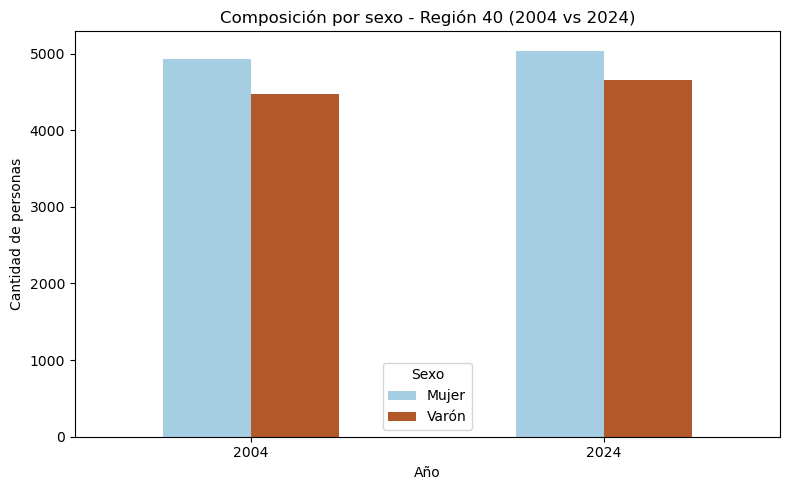

In [89]:
#Resolucion del ejercicio 3
#instalar matplotlib si no lo tienen. Debes sacar # de #!pip install matplotlib.
#!pip install matplotlib
#importar pandas y matplotlib
import pandas as pd 
import matplotlib.pyplot as plt
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
#Convertir los nombres de columnas a mayusculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
# Homogeneizar valores
df_2004["REGION"] = 40
df_2004['CH04'] = df_2004['CH04'].map({'Varón': 1, 'Mujer': 2})
# Agregar columna de año para identificar luego
df_2004["AÑO"] = 2004
df_2024["AÑO"] = 2024
# Seleccionar sólo variables necesarias
df_2004_sexo = df_2004[["CH04", "AÑO"]]
df_2024_sexo = df_2024[["CH04", "AÑO"]]
# Unir bases
df_sexo = pd.concat([df_2004_sexo, df_2024_sexo])
# Reemplazar códigos por etiquetas
df_sexo["CH04"] = df_sexo["CH04"].replace({1: "Varón", 2: "Mujer"})
# Agrupar y contar
sexo_counts = df_sexo.groupby(["AÑO", "CH04"]).size().unstack()
# Graficar
sexo_counts.plot(kind="bar", figsize=(8, 5), colormap="Paired")
plt.title("Composición por sexo - Región 40 (2004 vs 2024)")
plt.xlabel("Año")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=0)
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()

In [13]:
print("La cantidad de mujeres en el 2004 son superiores a las de los hombres y en el 2024 tambien.")

La cantidad de mujeres en el 2004 son superiores a las de los hombres y en el 2024 tambien.


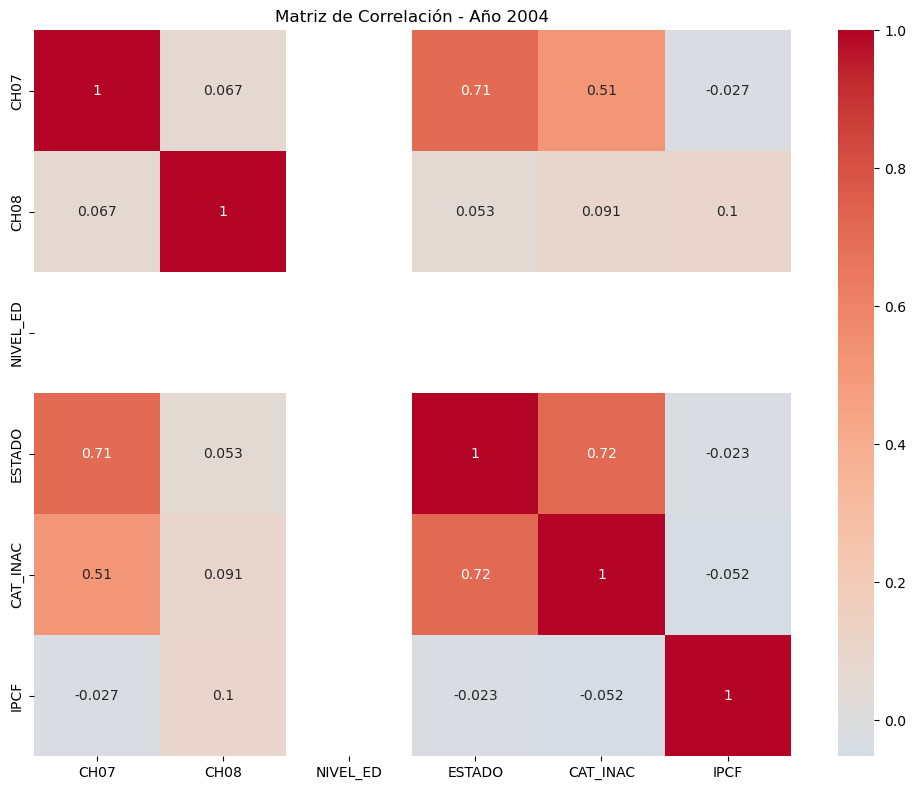

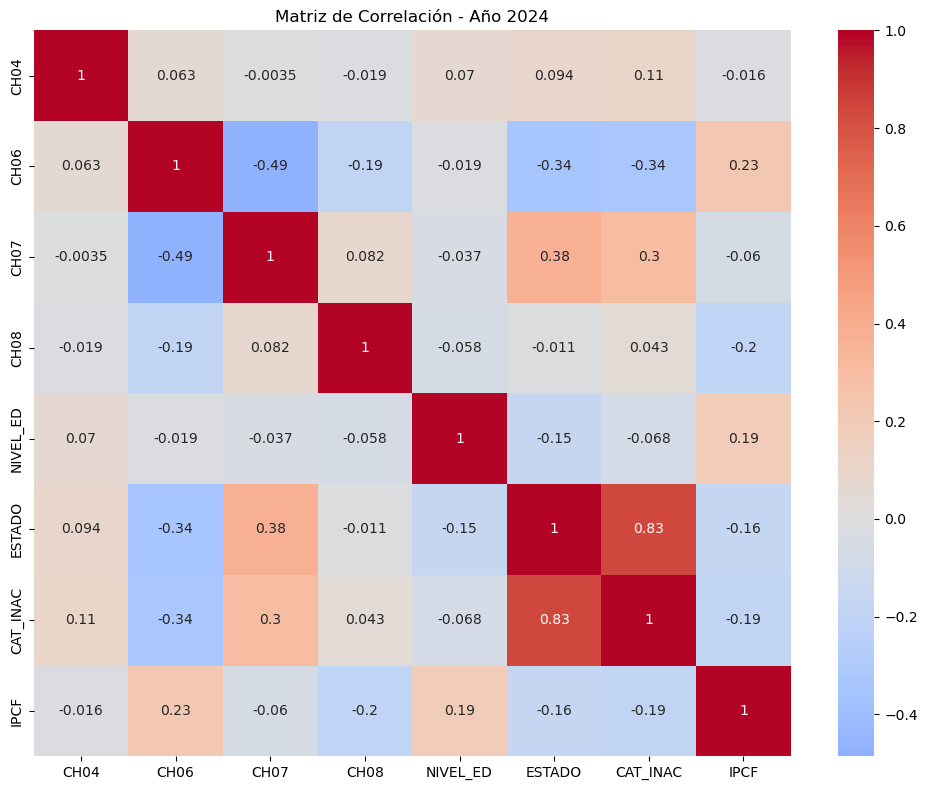

In [91]:
#Resolucion del ejercicio 4
#instalar seaborn si no lo tienen. Debes sacar # de #!pip install seaborn.
#!pip install seaborn
#importar pandas, matplotlib y seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
#Convertir los nombres de columnas a mayusculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
df_2004["REGION"] = 40  # Homogeneizar valores de REGION
# Homogeneizar los valores
df_2004['CH04'] = df_2004['CH04'].map({'Varón': 1, 'Mujer': 2})
df_2004['CH08'] = df_2004['CH08'].map({'Obra social (incluye PAMI)': 1, 'Mutual/prepaga/servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns/Nr': 9, 'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Obra social y planes y seguros públicos': 13, 'Mutual/prepaga/servicio de emergencia/Planes y seguros públicos': 23, 'Obra social, mutual/prepaga/servicio de emergencia y planes y seguros públicos': 123})
df_2004['CH07'] = df_2004['CH07'].map({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
df_2004['NIVEL_ED'] = df_2004['NIVEL_ED'].map({'Primario incompleto (incluye educación especial)': 1, 'Primario completo': 2, 'Secundario incompleto': 3, 'Secundario completo': 4, 'Superior universitario incompleto': 5, 'Superior universitario completo': 6, 'Sin instrucción': 7, 'Ns/Nr': 9,})
df_2004['ESTADO'] = df_2004['ESTADO'].map({'Entrevista individual no realizada (no respuesta al cuestionario individual)': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4})
df_2004['CAT_INAC'] = df_2004['CAT_INAC'].map({'Jubilado/pensionado': 1, 'Rentista': 2, 'Estudiante': 3, 'Ama de casa': 4, 'Menor de 6 años': 5, 'Discapacitado': 6, 'Otros': 7})
df_2024['IPCF'] = df_2024['IPCF'].replace(0, np.nan)
df_2024['CH06'] = df_2024['CH06'].replace(0, np.nan)
df_2004['IPCF'] = df_2004['IPCF'].replace(0, np.nan)
df_2004['CH06'] = df_2004['CH06'].replace(0, np.nan)
# Variables a usar
variables = ["CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]
# Filtrar variables para cada año y eliminar filas con valores faltantes o sin sentido
df_2024_corr = df_2024[variables].dropna()
df_2004_corr = df_2004[variables].dropna()
# Matriz de correlación 2004
corr_2004 = df_2004_corr.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2004, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación - Año 2004")
plt.tight_layout()
plt.show()
# Matriz de correlación 2024
corr_2024 = df_2024_corr.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2024, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación - Año 2024")
plt.tight_layout()
plt.show()

In [27]:
print("La matriz de correlación del año 2004 muestra únicamente la variable PCF, por lo que el resultado refleja una autocorrelación perfecta (valor = 1). Esto indica que no hay otras variables en el conjunto de datos para ese año o que el filtrado previo dejó una sola variable numérica disponible. Para que la matriz de correlación aporte información útil sobre relaciones entre variables, sería necesario contar con múltiples variables numéricas en el dataset.")

La matriz de correlación del año 2004 muestra únicamente la variable PCF, por lo que el resultado refleja una autocorrelación perfecta (valor = 1). Esto indica que no hay otras variables en el conjunto de datos para ese año o que el filtrado previo dejó una sola variable numérica disponible. Para que la matriz de correlación aporte información útil sobre relaciones entre variables, sería necesario contar con múltiples variables numéricas en el dataset.


In [25]:
print("En la matriz del 2024, muestra la correlación lineal (coeficiente de Pearson) entre distintas variables del dataset. Los valores van desde -1 (correlación negativa perfecta) hasta 1 (correlación positiva perfecta). Los colores ayudan a visualizar: tonos rojizos indican correlaciones positivas, y azulados, negativas.")

En la matriz del 2024, muestra la correlación lineal (coeficiente de Pearson) entre distintas variables del dataset. Los valores van desde -1 (correlación negativa perfecta) hasta 1 (correlación positiva perfecta). Los colores ayudan a visualizar: tonos rojizos indican correlaciones positivas, y azulados, negativas.


In [77]:
#Resolucion del ejercicio 5
#importar pandas
import pandas as pd
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
#Convertir los nombres de columnas a mayusculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
# Homogeneizar valores
df_2004["REGION"] = 40
df_2004['ESTADO'] = df_2004['ESTADO'].map({'Entrevista individual no realizada (no respuesta al cuestionario individual)': 0 , 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4})
df_2024['IPCF'] = df_2024['IPCF'].replace(0, np.nan)
df_2004['IPCF'] = df_2004['IPCF'].replace(0, np.nan)
# Agregar columna de año para identificar luego
df_2004["AÑO"] = 2004
df_2024["AÑO"] = 2024
# Unir ambos archivos
df = pd.concat([df_2024, df_2004])
# Filtrar variables necesarias
df_estado = df[["ESTADO", "IPCF"]].copy()
# Reemplazar códigos por etiquetas
estado_labels = {1: "Ocupado", 2: "Desocupado", 3: "Inactivo"}
df_estado["ESTADO"] = df_estado["ESTADO"].map(estado_labels)
# Contar cuántos hay en cada estado
estado_counts = df_estado["ESTADO"].value_counts()
# Calcular media del IPCF según estado
ipcf_mean_by_estado = df_estado.groupby("ESTADO")["IPCF"].mean().round(2)
print("Cantidad de personas por estado:\n", estado_counts)
print("\nMedia de IPCF por estado:\n", ipcf_mean_by_estado)

Cantidad de personas por estado:
 ESTADO
Ocupado       7600
Inactivo      7596
Desocupado     853
Name: count, dtype: int64

Media de IPCF por estado:
 ESTADO
Desocupado     33607.05
Inactivo       75589.48
Ocupado       102329.39
Name: IPCF, dtype: float64


In [79]:
print("Hay 853 de desocupados en la muestra, hay 7596 inactivos en la muestra y hay 7600 ocupado. Tambien la media de ingreso per capita per capita familiar segun estado es por desocupado es 102329.39, de inactivo de 75589.48 y ocupado 102329.39")

Hay 853 de desocupados en la muestra, hay 7596 inactivos en la muestra y hay 7600 ocupado. Tambien la media de ingreso per capita per capita familiar segun estado es por desocupado es 102329.39, de inactivo de 75589.48 y ocupado 102329.39


In [75]:
#Resolucion del ejercicio 6
#importar pandas
import pandas as pd
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
#Convertir los nombres de columnas a mayusculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
# Homogeneizar valores
df_2004["REGION"] = 40
df_2004['ESTADO'] = df_2004['ESTADO'].map({'Entrevista individual no realizada (no respuesta al cuestionario individual)': 0 , 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4})
# Agregar columna de año para identificar luego
df_2004["AÑO"] = 2004
df_2024["AÑO"] = 2024
# Unir bases
df = pd.concat([df_2004, df_2024])
# Contar cuántos no respondieron (ESTADO = 0)
no_respondieron_count = (df["ESTADO"] == 0).sum()
print(f"Cantidad de personas que no respondieron su condición de actividad: {no_respondieron_count}")
# Dividir las bases
respondieron = df[df["ESTADO"] != 0]
norespondieron = df[df["ESTADO"] == 0]
# Guardar como excel
respondieron.to_excel ("respondieron.xlsx", index = False)
norespondieron.to_excel ("norespondieron.xlsx", index = False)

Cantidad de personas que no respondieron su condición de actividad: 9


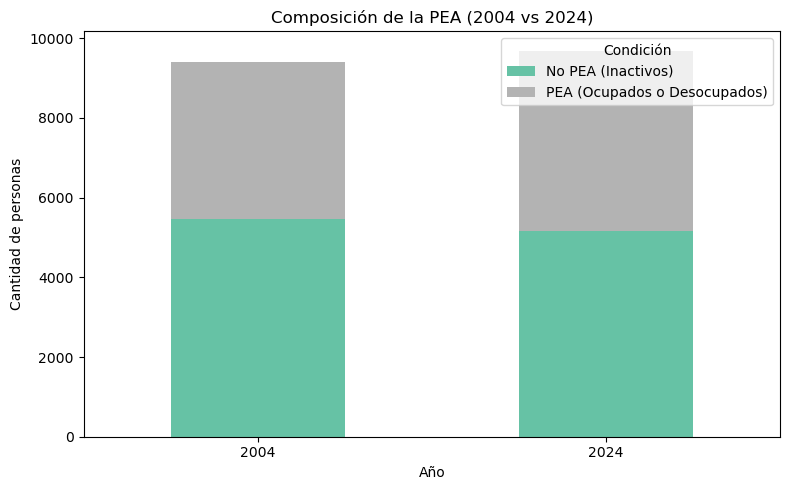

In [71]:
#Resolucion del ejercicio 7
# Importar pandas, seaborn y matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
# Convertir los nombres de columnas a mayúsculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40 o NOA
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
# Homogeneizar valores
df_2004["REGION"] = 40
df_2004['ESTADO'] = df_2004['ESTADO'].map({'Entrevista individual no realizada (no respuesta al cuestionario individual)': 0 , 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4})
# Agregar columna de año para identificar luego
df_2004["AÑO"] = 2004
df_2024["AÑO"] = 2024
# Unir los dos dataframes
df = pd.concat([df_2004, df_2024], ignore_index=True)
# Filtrar quienes respondieron estado, y crear copia para evitar advertencias
respondieron = df[df["ESTADO"] != 0].copy()
# Crear variable PEA: 1 si ESTADO es 1 o 2, 0 si es 3
respondieron["PEA"] = respondieron["ESTADO"].apply(lambda x: 1 if x in [1, 2] else 0)
# Agrupar por año y PEA
pea_counts = respondieron.groupby(["AÑO", "PEA"]).size().unstack()
# Reemplazar nombres para claridad en gráfico
pea_counts.columns = ["No PEA (Inactivos)", "PEA (Ocupados o Desocupados)"]
# Ordenar los años (opcional, para mejor presentación)
pea_counts = pea_counts.sort_index()
# Graficar
pea_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Set2")
plt.title("Composición de la PEA (2004 vs 2024)")
plt.xlabel("Año")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=0)
plt.legend(title="Condición")
plt.tight_layout()
plt.show()

In [73]:
print("En el 2004 la cantidad de inactivos es mayor que el 2024 y su cantidad de PEA tambien es mayor que el 2024")

En el 2004 la cantidad de inactivos es mayor que el 2024 y su cantidad de PEA tambien es mayor que el 2024


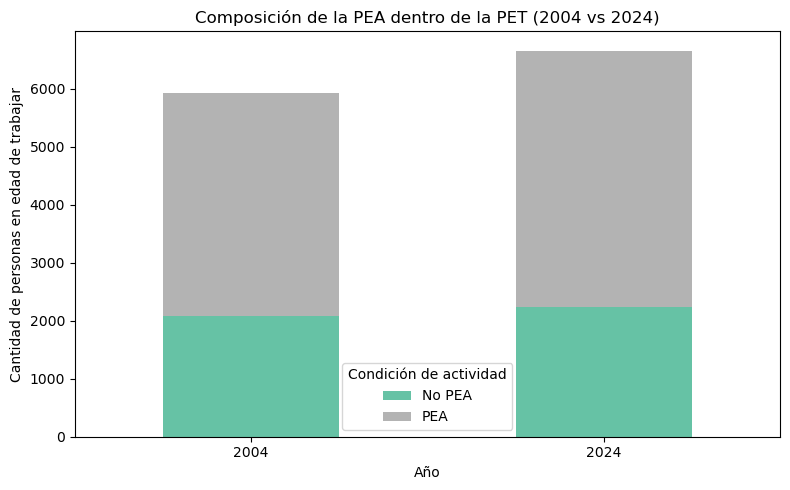

In [99]:
#Resolucion del ejercicio 8
#importar pandas, numpy, matplotlib y seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
#Convertir los nombres de columnas a mayusculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
# Homogeneizar valores
df_2004["REGION"] = 40
df_2004['ESTADO'] = df_2004['ESTADO'].map({'Entrevista individual no realizada (no respuesta al cuestionario individual)': 0 , 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4})
df_2004['CH06'] = pd.to_numeric(df_2004['CH06'], errors='coerce')
df_2004['CH06'] = df_2004['CH06'].replace(0, np.nan)
df_2024['CH06'] = df_2024['CH06'].replace(0, np.nan)
# Agregar columna de año para identificar luego
df_2004["AÑO"] = 2004
df_2024["AÑO"] = 2024
# Unir y filtrar por quienes respondieron ESTADO
df = pd.concat([df_2004, df_2024], ignore_index=True)
respondieron = df[df["ESTADO"] != 0].copy()
# Crear columna PEA: 1 si ESTADO es 1 (ocupado) o 2 (desocupado), 0 si 3 (inactivo)
respondieron["PEA"] = respondieron["ESTADO"].apply(lambda x: 1 if x in [1, 2] else 0)
# Crear columna PET: 1 si edad (CH06) entre 15 y 65 años inclusive
respondieron["CH06"] = pd.to_numeric(respondieron["CH06"], errors='coerce')
respondieron["PET"] = respondieron["CH06"].apply(lambda x: 1 if 15 <= x <= 65 else 0)
# Filtrar sólo personas PET
pet_df = respondieron[respondieron["PET"] == 1]
# Agrupar por año y PEA (dentro de PET)
pea_counts_pet = pet_df.groupby(["AÑO", "PEA"]).size().unstack()
pea_counts_pet.columns = ["No PEA", "PEA"]
# Graficar
pea_counts_pet.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Set2")
plt.title("Composición de la PEA dentro de la PET (2004 vs 2024)")
plt.xlabel("Año")
plt.ylabel("Cantidad de personas en edad de trabajar")
plt.xticks(rotation=0)
plt.legend(title="Condición de actividad")
plt.tight_layout()
plt.show()

In [101]:
print("La cantidad de personas en edad de trabajar en el 2004 tiene menores inactivos que el 2024, tambien tiene menores ocupados y desocupados que el 2024. Sin embargo, la cantidad de personas en edad de trabajar en el 2024 es mayor que el 2004")

La cantidad de personas en edad de trabajar en el 2004 tiene menores inactivos que el 2024, tambien tiene menores ocupados y desocupados que el 2024. Sin embargo, la cantidad de personas en edad de trabajar en el 2024 es mayor que el 2004


In [103]:
#Resolucion del ejercicio 9
#importar pandas
import pandas as pd
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
#Convertir los nombres de columnas a mayusculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
# Homogeneizar valores
df_2004["REGION"] = 40
df_2004['ESTADO'] = df_2004['ESTADO'].map({'Entrevista individual no realizada (no respuesta al cuestionario individual)': 0 , 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4})
# Agregar columna de año para identificar luego
df_2004["AÑO"] = 2004
df_2024["AÑO"] = 2024
# Unir y filtrar quienes respondieron ESTADO
df = pd.concat([df_2004, df_2024], ignore_index=True)
respondieron = df[df["ESTADO"] != 0].copy()
# Crear columna "desocupado": 1 si ESTADO == 2
respondieron["desocupado"] = respondieron["ESTADO"].apply(lambda x: 1 if x == 2 else 0)
# Contar desocupados por año
desocupados_por_año = respondieron.groupby("AÑO")["desocupado"].sum()
print("Cantidad de personas desocupadas por año:")
print(desocupados_por_año)

Cantidad de personas desocupadas por año:
AÑO
2004    597
2024    256
Name: desocupado, dtype: int64


In [107]:
print("En el 2004 la cantidad de personas desocupadas es 597 y en el 2024 se ve un disminuye a ser 256.")

En el 2004 la cantidad de personas desocupadas es 597 y en el 2024 se ve un disminuye a ser 256.


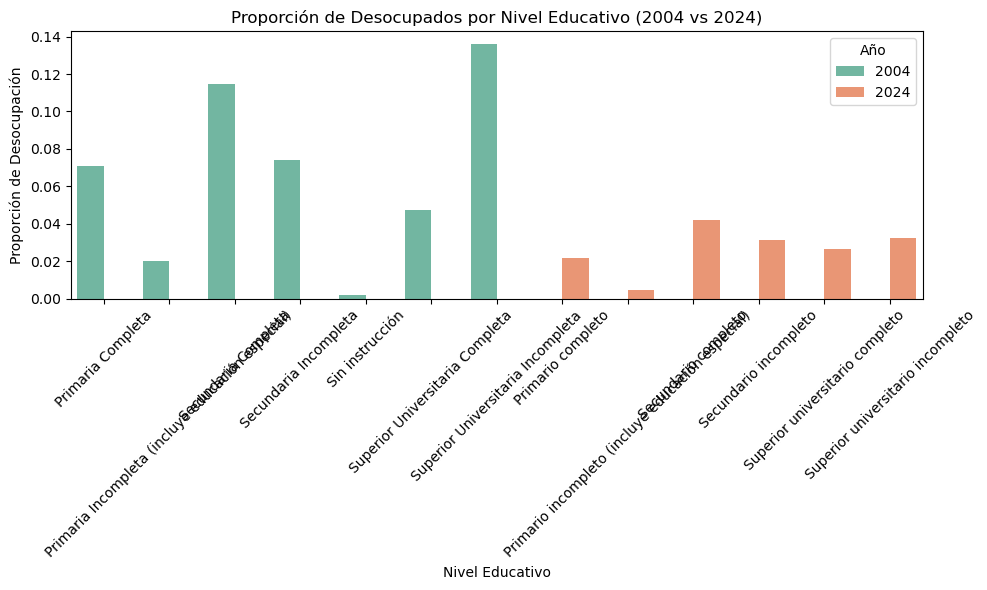

In [110]:
#Resolucion del ejercicio 9.A
#importar pandas, matplotlib y seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
#Convertir los nombres de columnas a mayusculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
# Homogeneizar valores
df_2004["REGION"] = 40
df_2004['ESTADO'] = df_2004['ESTADO'].map({'Entrevista individual no realizada (no respuesta al cuestionario individual)': 0 , 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4})
df_2024['NIVEL_ED'] = df_2024['NIVEL_ED'].map({1: 'Primario incompleto (incluye educación especial)', 2: 'Primario completo', 3: 'Secundario incompleto', 4: 'Secundario completo', 5:'Superior universitario incompleto', 6:'Superior universitario completo', 7:'Sin instrucción', 9:'Ns/Nr'})
# Agregar columna de año para identificar luego
df_2004["AÑO"] = 2004
df_2024["AÑO"] = 2024
# Unir y filtrar quienes respondieron ESTADO
df = pd.concat([df_2004, df_2024], ignore_index=True)
respondieron = df[df["ESTADO"] != 0].copy()
# Crear columna desocupado
respondieron["desocupado"] = respondieron["ESTADO"].apply(lambda x: 1 if x == 2 else 0)
# Agrupar por año y nivel educativo
edu_group = respondieron.groupby(["AÑO", "NIVEL_ED"])
# Calcular proporción de desocupados por nivel educativo
desocup_prop = edu_group["desocupado"].mean().reset_index()
desocup_prop.columns = ["AÑO", "NIVEL_ED", "Proporcion_Desocupados"]
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=desocup_prop, x="NIVEL_ED", y="Proporcion_Desocupados", hue="AÑO", palette="Set2")
plt.title("Proporción de Desocupados por Nivel Educativo (2004 vs 2024)")
plt.xlabel("Nivel Educativo")
plt.ylabel("Proporción de Desocupación")
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.tight_layout()
plt.show()

In [120]:
print("Si, hubieron cambios de desocupados por nivel educativo.")

Si, hubieron cambios de desocupados por nivel educativo.


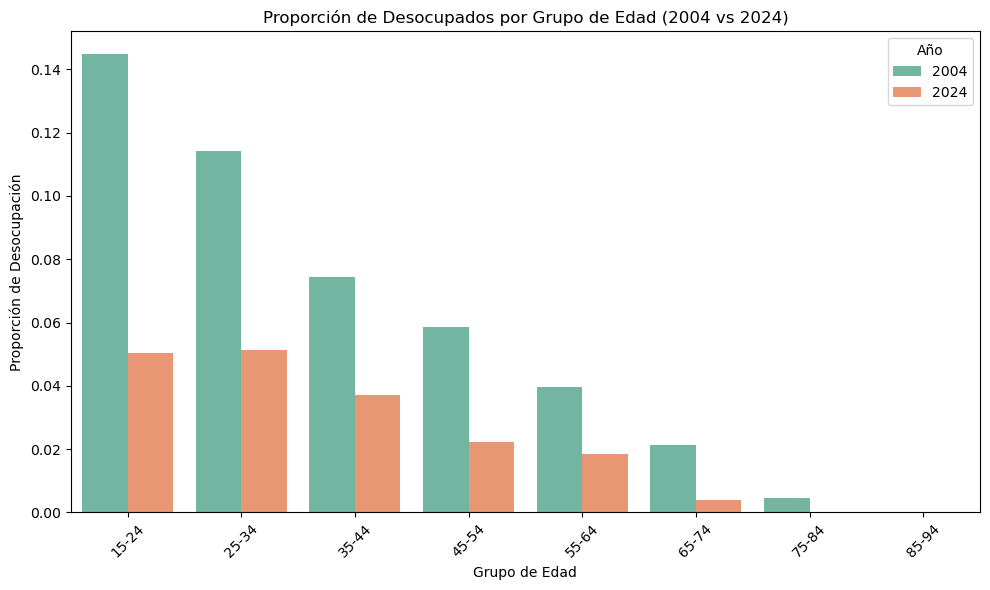

In [112]:
#Resolucion del ejercicio 9.B
#importar pandas, numpy, matplotlib y seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
# Convertir los nombres de columnas a mayúsculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"] 
# Homogeneizar valores
df_2004["REGION"] = 40
df_2004['ESTADO'] = df_2004['ESTADO'].map({'Entrevista individual no realizada (no respuesta al cuestionario individual)': 0 , 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4})
df_2004['CH06'] = pd.to_numeric(df_2004['CH06'], errors='coerce')
df_2004['CH06'] = df_2004['CH06'].replace(0, np.nan)
df_2024['CH06'] = df_2024['CH06'].replace(0, np.nan)
# Agregar columna de año
df_2004["AÑO"] = 2004
df_2024["AÑO"] = 2024
# Unir los dataframes
df = pd.concat([df_2004, df_2024], ignore_index=True)
# Filtrar personas que respondieron (ESTADO distinto de 0)
respondieron = df[df["ESTADO"] != 0].copy()
# Crear columna 'desocupado'
respondieron["desocupado"] = respondieron["ESTADO"].apply(lambda x: 1 if x == 2 else 0)
# Asegurar que CH06 (edad) sea numérico
respondieron["CH06"] = pd.to_numeric(respondieron["CH06"], errors='coerce')
# Eliminar filas con edad no válida
respondieron = respondieron.dropna(subset=["CH06"])
# Crear columna categórica de edad
edad_bins = [14, 24, 34, 44, 54, 64, 74, 84, 94]
edad_labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94']
respondieron["edad_grupo"] = pd.cut(respondieron["CH06"], bins=edad_bins, labels=edad_labels, right=True)
# Agrupar y calcular proporción de desocupados (con observed=True para evitar advertencia)
desocup_prop_edad = respondieron.groupby(["AÑO", "edad_grupo"], observed=True)["desocupado"].mean().reset_index()
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=desocup_prop_edad, x="edad_grupo", y="desocupado", hue="AÑO", palette="Set2")
plt.title("Proporción de Desocupados por Grupo de Edad (2004 vs 2024)")
plt.xlabel("Grupo de Edad")
plt.ylabel("Proporción de Desocupación")
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.tight_layout()
plt.show()

In [121]:
print("Si, hubo cambios de desocupados por edad.")

Si, hubo cambios de desocupados por edad.


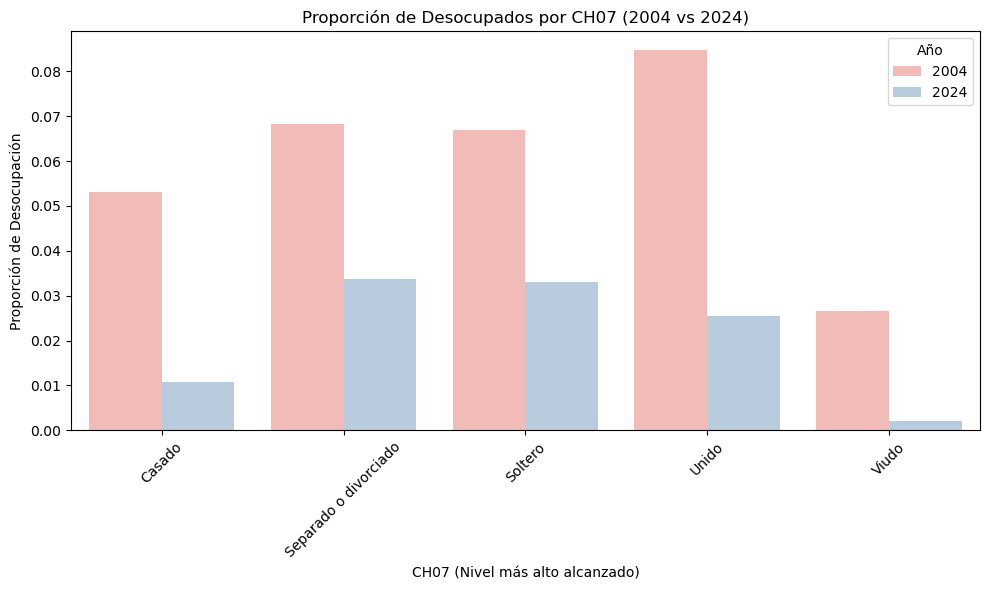

In [117]:
#Resolucion del ejercicio 9.C
#importar pandas, numpy, matplotlib y seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Leer los archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")
#Convertir los nombres de columnas a mayusculas
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()
# Filtrar solo región 40
df_2024 = df_2024[df_2024["REGION"] == 40]
df_2004 = df_2004[df_2004["REGION"] == "NOA"]
# Homogeneizar valores
df_2004["REGION"] = 40
df_2004['ESTADO'] = df_2004['ESTADO'].map({'Entrevista individual no realizada (no respuesta al cuestionario individual)': 0 , 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años': 4})
df_2024['CH07'] = df_2024['CH07'].map({1: 'Unido', 2:'Casado', 3:'Separado o divorciado', 4:'Viudo', 5:'Soltero'})
# Agregar columna de año para identificar luego
df_2004["AÑO"] = 2004
df_2024["AÑO"] = 2024
# Unir los dos trimestres
df = pd.concat([df_2004, df_2024], ignore_index=True)
respondieron = df[df["ESTADO"] != 0].copy()
# Crear columna "desocupado": 1 si ESTADO es 2 (desocupado), 0 si no
respondieron["desocupado"] = respondieron["ESTADO"].apply(lambda x: 1 if x == 2 else 0)
# Usar CH07 como variable de interés
grupo_ch07 = respondieron.groupby(["AÑO", "CH07"])
desocup_ch07 = grupo_ch07["desocupado"].mean().reset_index()
desocup_ch07.columns = ["AÑO", "CH07", "Proporcion_Desocupados"]
plt.figure(figsize=(10, 6))
sns.barplot(data=desocup_ch07, x="CH07", y="Proporcion_Desocupados", hue="AÑO", palette="Pastel1")
plt.title("Proporción de Desocupados por CH07 (2004 vs 2024)")
plt.xlabel("CH07 (Nivel más alto alcanzado)")
plt.ylabel("Proporción de Desocupación")
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.tight_layout()
plt.show()

In [122]:
print("Si, hubo cambios de desocupados por edad.")

Si, hubo cambios de desocupados por edad.


In [23]:
#Para convertir archivo .ipynb a pdf sin incluir los codigos
#Instala nbconvert si no lo tienes. Debes sacar # de #!pip install nbconvert
#!pip install nbconvert
#Usar el siguiente comando en la terminal: jupyter nbconvert --to pdf --TemplateExporter.exclude_input=True tu_archivo.ipynb